In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dict_dtype = {'Item_Number':str,
'Bottle_Volume (ml)':int,
'Bottles_Sold':int,
'Bottle_Retail':float,
'Store_Number':int}

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
categories_items_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\categories_items.csv',dtype={'Category':str,'Item_Number':str},index_col=0)

In [6]:
categories_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4471
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Number        4472 non-null   object
 1   Item_Description   4472 non-null   object
 2   Category           4472 non-null   object
 3   Category_Name      4472 non-null   object
 4   New_Category_Name  4472 non-null   object
dtypes: object(5)
memory usage: 209.6+ KB


In [7]:
categories_items_df = categories_items_df.drop(columns=['Item_Description'])

In [8]:
pdtypes = {'Item Number':str,'Vendor':str}

In [9]:
products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [10]:
list(products_iowa.columns)

['Item Number',
 'Category Name',
 'Item Description',
 'Vendor',
 'Vendor Name',
 'Bottle Volume (ml)',
 'Pack',
 'Inner Pack',
 'Age',
 'Proof',
 'List Date',
 'UPC',
 'SCC',
 'State Bottle Cost',
 'State Case Cost',
 'State Bottle Retail',
 'Report Date']

In [11]:
products_iowa = products_iowa.drop(columns=['Item Description'])

In [12]:
# products_iowa2 = products_iowa[['Item Number','Bottle Volume (ml)','State Bottle Retail','State Bottle Cost']]

In [13]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clustering_data_num_unique_stores.csv',dtype=dict_dtype, index_col=0)

In [14]:
products.Item_Number.value_counts().sort_values() 

72911     1
100216    1
100433    1
100423    1
100413    1
         ..
999918    1
999924    1
30016     2
89320     2
73811     2
Name: Item_Number, Length: 4472, dtype: int64

In [15]:
products.loc[products.Item_Number == '30016']

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Store_Number,Sales
846,30016,Foundry Gin,375,Gin,9.99,789,41,7882.11
847,30016,Foundry Gin,750,Gin,9.99,119,10,1188.81


In [16]:
products.rename({'Store_Number':'Num_Stores_Selling', 'Sales':'revenue'} ,axis=1, inplace=True)
              

In [17]:
combine_projects = products[['Item_Number', 'Item_Description', 'Bottles_Sold', 'Num_Stores_Selling']].merge(products_iowa, left_on ='Item_Number', right_on = 'Item Number')

In [18]:
combine_projects.columns

Index(['Item_Number', 'Item_Description', 'Bottles_Sold', 'Num_Stores_Selling',
       'Item Number', 'Category Name', 'Vendor', 'Vendor Name',
       'Bottle Volume (ml)', 'Pack', 'Inner Pack', 'Age', 'Proof', 'List Date',
       'UPC', 'SCC', 'State Bottle Cost', 'State Case Cost',
       'State Bottle Retail', 'Report Date'],
      dtype='object')

In [19]:
combine_projects = combine_projects.drop(columns=['Item Number','Vendor','Vendor Name','Pack', 'Inner Pack', 'Age',
        'List Date', 'UPC', 'SCC','Report Date'])

In [20]:
combine_projects.shape

(4474, 10)

identify and clean duplicates

In [21]:
combine_projects.Item_Number.value_counts().sort_values()

72911     1
101104    1
100216    1
100433    1
100423    1
         ..
999918    1
999924    1
30016     2
89320     2
73811     2
Name: Item_Number, Length: 4471, dtype: int64

In [22]:
dupes =['30016','89320','73811']

create DataFrame that excludes duplicated item numbers

In [23]:
# create DataFrame that excludes duplicated item numbers

combine_projects_ex = combine_projects.loc[~combine_projects.Item_Number.isin(dupes),:]
combine_projects_ex.shape

(4468, 10)

create DataFrame of rows with duplicated item numbers


In [24]:
combine_projects_dupes = combine_projects.loc[combine_projects.Item_Number.isin(dupes),:]
combine_projects_dupes.shape

(6, 10)

In [25]:
list(combine_projects_dupes.columns)

['Item_Number',
 'Item_Description',
 'Bottles_Sold',
 'Num_Stores_Selling',
 'Category Name',
 'Bottle Volume (ml)',
 'Proof',
 'State Bottle Cost',
 'State Case Cost',
 'State Bottle Retail']

In [26]:
combine_projects_dupes.columns

Index(['Item_Number', 'Item_Description', 'Bottles_Sold', 'Num_Stores_Selling',
       'Category Name', 'Bottle Volume (ml)', 'Proof', 'State Bottle Cost',
       'State Case Cost', 'State Bottle Retail'],
      dtype='object')

clean up duplicates

In [27]:
cleaned_dupes_df = combine_projects_dupes.groupby(['Item_Number', 'Item_Description',
       'Category Name', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Case Cost', 'State Bottle Retail']).agg({'Bottles_Sold':'sum',
                                                                            'Num_Stores_Selling':'sum'}).reset_index()

concatenate combine_projects_ex which excludes duplicates with cleaned_dupes_df

In [28]:
new_combine_proj_df = pd.concat([combine_projects_ex,cleaned_dupes_df])

In [29]:
new_combine_proj_df.shape #shape checks out

(4471, 10)

In [30]:
# new_combine_proj_df = new_combine_proj_df.drop(columns=['Item Description'])

In [31]:
new_combine_proj_df.rename({'Bottle Volume (ml)':'Bottle_Volume','State Bottle Retail':'Bottle_Retail' } ,axis=1, inplace=True)

check missing values

In [32]:
from missing_columns_pd import miss_cols

In [33]:
miss_cols(new_combine_proj_df)

[('Proof', 3, 0.0007)]

In [34]:
new_combine_proj_df.Proof.median()

80.0

In [35]:
new_combine_proj_df['Proof'].fillna(new_combine_proj_df.Proof.median())

0       66.0
1       80.0
2       94.0
3       80.0
4       80.0
        ... 
4472    90.0
4473    90.0
0       80.0
1       80.0
2       80.0
Name: Proof, Length: 4471, dtype: float64

In [36]:
new_combine_proj_df['Proof'] = new_combine_proj_df['Proof'].fillna(new_combine_proj_df.Proof.median())

In [37]:
products = new_combine_proj_df.merge(categories_items_df,right_on='Item_Number',left_on='Item_Number')
products.shape

(4471, 13)

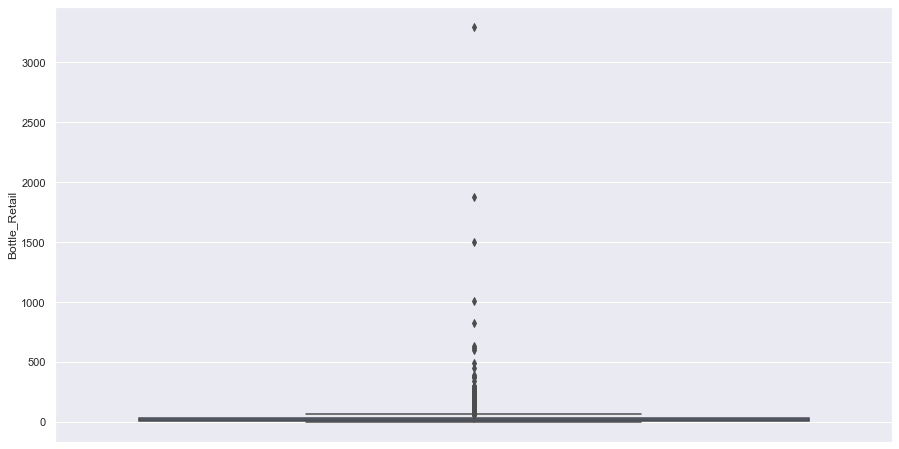

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot( y=products["Bottle_Retail"] );
plt.show()

In [38]:
products2 = products.copy()

In [39]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4471 entries, 0 to 4470
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4471 non-null   object 
 1   Item_Description    4471 non-null   object 
 2   Bottles_Sold        4471 non-null   int32  
 3   Num_Stores_Selling  4471 non-null   int32  
 4   Category Name       4471 non-null   object 
 5   Bottle_Volume       4471 non-null   int64  
 6   Proof               4471 non-null   float64
 7   State Bottle Cost   4471 non-null   float64
 8   State Case Cost     4471 non-null   float64
 9   Bottle_Retail       4471 non-null   float64
 10  Category            4471 non-null   object 
 11  Category_Name       4471 non-null   object 
 12  New_Category_Name   4471 non-null   object 
dtypes: float64(4), int32(2), int64(1), object(6)
memory usage: 454.1+ KB


In [40]:
products.describe()

,Bottles_Sold,Num_Stores_Selling,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail
count,4.471000e+03,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000
mean,6.936512e+03,125.356072,792.460971,75.147618,21.081058,138.906929,31.628141
std,3.973952e+04,214.295687,410.860733,21.313410,48.613978,120.611650,72.920898
min,1.000000e+00,1.000000,20.000000,19.000000,0.660000,18.000000,0.990000
25%,5.250000e+01,3.000000,750.000000,70.000000,7.875000,75.000000,11.815000
50%,5.480000e+02,49.000000,750.000000,80.000000,13.520000,108.240000,20.280000
75%,3.626500e+03,154.500000,750.000000,86.000000,23.500000,165.570000,35.250000
max,2.105088e+06,1725.000000,5250.000000,190.000000,2198.890000,2198.890000,3298.340000


In [41]:
products.shape

(4471, 13)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

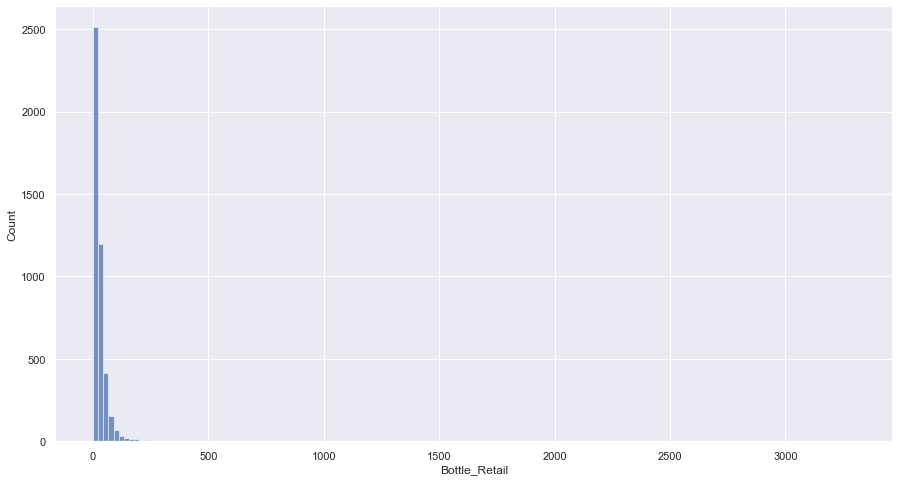

In [42]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


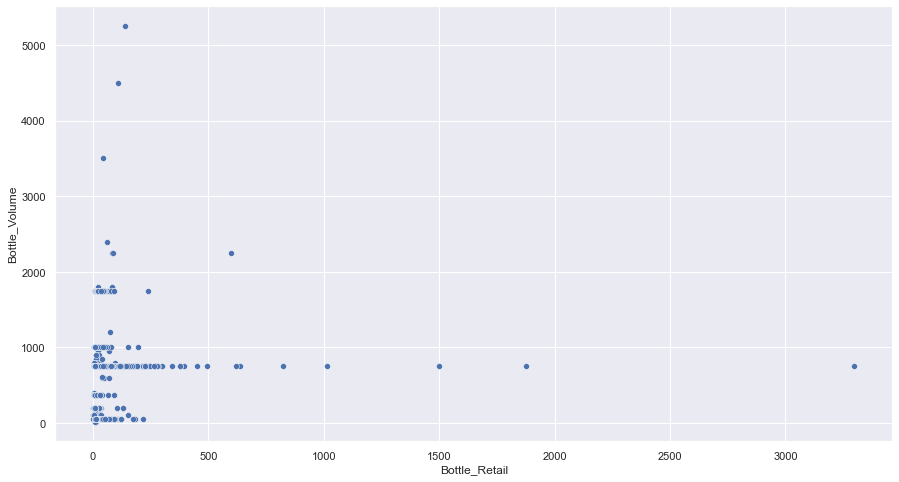

In [43]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [44]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012357040712554675

In [45]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04238487486136195

In [46]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.00019054319178971472

In [47]:
products.Bottles_Sold.corr((products.Num_Stores_Selling))

0.45376397568801763

In [48]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
1633,48725,Remy Martin Louis XIII,17,12,Imported Brandies,750,80.0,2198.89,2198.89,3298.34,1052100,Imported Brandies,Brandies
3323,917673,HA Double Eagle Very Rare,2,2,Straight Bourbon Whiskies,750,101.0,1000.00,1000.00,1500.00,1011200,Straight Bourbon Whiskies,Bourbon
3360,919976,HA OFC Bourbon 1995,10,10,Straight Bourbon Whiskies,750,90.0,1250.00,1250.00,1875.00,1011200,Straight Bourbon Whiskies,Bourbon


In [49]:
filt2 = products.Bottle_Volume > 3000
products[filt2]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
0,100015,Fireball Cinnamon Whiskey Bag in Box,1123,129,Whiskey Liqueur,3500,66.0,30.0,90.0,45.0,1081600,Whiskey Liqueur,Whiskey Liqueur
139,101515,Fireball Cinnamon Whiskey Keg,180,141,Temporary & Specialty Packages,5250,66.0,92.0,92.0,138.0,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
155,101665,Stumpys Spirits Cocktail Collection Gift Set,115,26,Temporary & Specialty Packages,4500,25.0,72.0,72.0,108.0,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages


In [50]:
np.sum(products.Bottles_Sold)

31013146

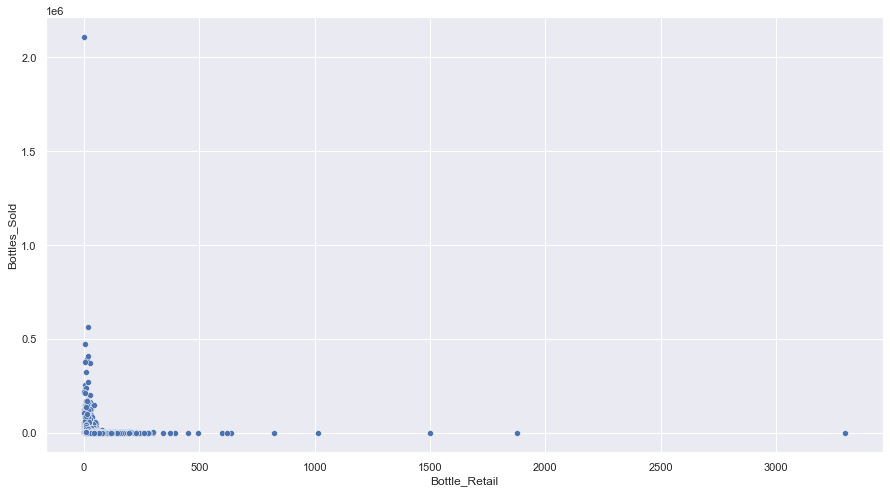

In [51]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

In [52]:
filt = products.Bottle_Retail > 750
products[filt]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
1335,4113,Hennessy Paradis,27,15,Imported Brandies,750,80.0,549.99,1649.97,824.99,1052100,Imported Brandies,Brandies
1633,48725,Remy Martin Louis XIII,17,12,Imported Brandies,750,80.0,2198.89,2198.89,3298.34,1052100,Imported Brandies,Brandies
3187,906532,Glengoyne 30 YO,1,1,Scotch Whiskies,750,94.0,675.00,675.00,1012.50,1012200,Scotch Whiskies,Scotch
3323,917673,HA Double Eagle Very Rare,2,2,Straight Bourbon Whiskies,750,101.0,1000.00,1000.00,1500.00,1011200,Straight Bourbon Whiskies,Bourbon
3360,919976,HA OFC Bourbon 1995,10,10,Straight Bourbon Whiskies,750,90.0,1250.00,1250.00,1875.00,1011200,Straight Bourbon Whiskies,Bourbon


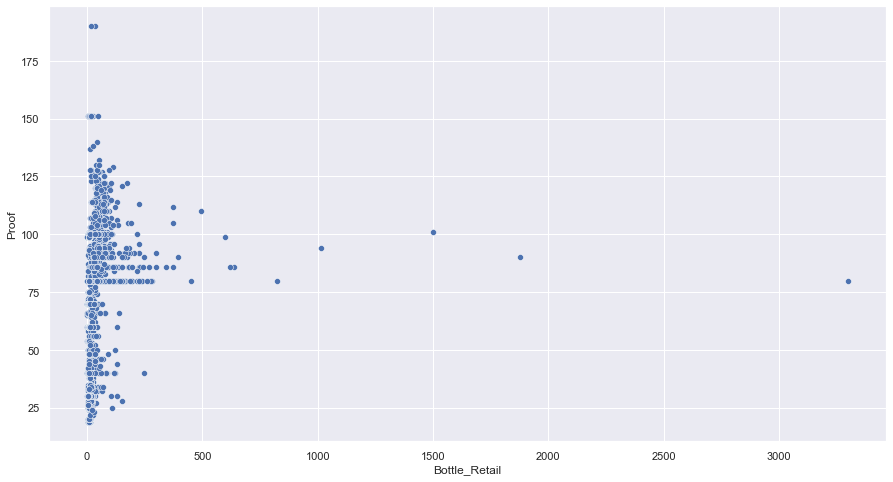

In [53]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Proof')

remove outliers

In [54]:
filt = products2.Bottle_Retail > 750 #drop outliers of Bottle Retail

In [55]:
products2[filt]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
1335,4113,Hennessy Paradis,27,15,Imported Brandies,750,80.0,549.99,1649.97,824.99,1052100,Imported Brandies,Brandies
1633,48725,Remy Martin Louis XIII,17,12,Imported Brandies,750,80.0,2198.89,2198.89,3298.34,1052100,Imported Brandies,Brandies
3187,906532,Glengoyne 30 YO,1,1,Scotch Whiskies,750,94.0,675.00,675.00,1012.50,1012200,Scotch Whiskies,Scotch
3323,917673,HA Double Eagle Very Rare,2,2,Straight Bourbon Whiskies,750,101.0,1000.00,1000.00,1500.00,1011200,Straight Bourbon Whiskies,Bourbon
3360,919976,HA OFC Bourbon 1995,10,10,Straight Bourbon Whiskies,750,90.0,1250.00,1250.00,1875.00,1011200,Straight Bourbon Whiskies,Bourbon


In [56]:

products2 = products2[~filt]

In [57]:
products2.shape

(4466, 13)

In [58]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [59]:
products2 = products2[~filt2] 

In [60]:
products2.shape

(4463, 13)

In [61]:
filt3= products2.Item_Number == '64870'  #outlier of bottles sold

In [62]:
products2[filt3]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
2032,64870,Fireball Cinnamon Whiskey,2105088,893,Whiskey Liqueur,100,66.0,0.9,43.2,1.35,1081600,Whiskey Liqueur,Whiskey Liqueur


In [63]:
# products2[filt3]


products2 = products2[~filt3]

## write out products2

In [64]:
products2.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\products2_outliers_removed.csv')

## scale data for clustering

In [65]:
products2.shape

(4462, 13)

In [66]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold','Proof']

In [67]:
scaler = StandardScaler()

In [68]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled','Proof_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold','Proof']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled','Proof_scaled' ]].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,Proof_scaled
count,4.462000e+03,4.462000e+03,4.462000e+03,4.462000e+03
mean,-1.199300e-17,-8.143792e-17,1.777924e-16,-4.727492e-15
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.926663e+00,-7.888930e-01,-2.655110e-01,-2.634743e+00
25%,-1.006248e-01,-4.917779e-01,-2.633385e-01,-2.416330e-01
50%,-1.006248e-01,-2.600172e-01,-2.428843e-01,2.276042e-01
75%,-1.006248e-01,1.459073e-01,-1.167158e-01,5.091465e-01
max,4.026723e+00,1.668707e+01,2.282271e+01,5.389213e+00


In [69]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ,'Proof_scaled']


determine optimal number of clusters

In [70]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.6203861914598588
number of clusters =  3   silhouette score =  0.6046455798013558
number of clusters =  4   silhouette score =  0.6349270702891548
number of clusters =  5   silhouette score =  0.5776198731054586
number of clusters =  6   silhouette score =  0.5878816908567607
number of clusters =  7   silhouette score =  0.5977902628097711
number of clusters =  8   silhouette score =  0.544004439444585
number of clusters =  9   silhouette score =  0.5513405611990584
number of clusters =  10   silhouette score =  0.47626804899351083


In [71]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

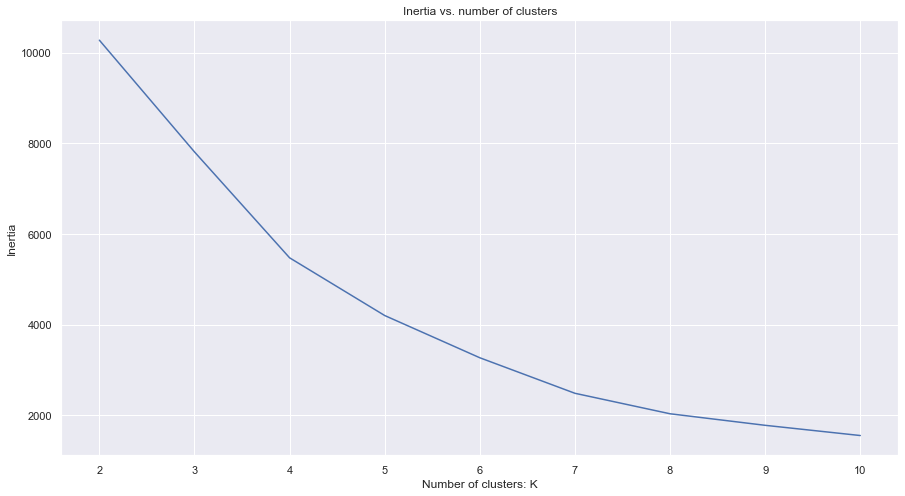

In [72]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get four clusters

In [73]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [74]:
products2.head()

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,Proof_scaled,product_cluster
1,10006,Scoresby Rare Scotch,4619,197,Scotch Whiskies,750,80.0,5.13,61.56,7.70,1012200,Scotch Whiskies,Scotch,-0.100625,-0.604638,-0.076217,0.227604,0
2,100077,Kraken Rum w/ Tiki Glass,2679,136,Temporary & Specialty Packages,750,94.0,10.45,62.70,15.68,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.100625,-0.385509,-0.155739,0.884536,0
3,10008,Scoresby Rare Scotch,12340,287,Scotch Whiskies,1750,80.0,10.50,63.00,15.75,1012200,Scotch Whiskies,Scotch,2.400798,-0.383586,0.240270,0.227604,1
4,10009,Scoresby Rare Scotch,1722,70,Scotch Whiskies,1000,80.0,6.74,80.88,10.11,1012200,Scotch Whiskies,Scotch,0.524731,-0.538460,-0.194966,0.227604,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,606,120,Temporary & Specialty Packages,750,94.0,27.59,165.54,41.39,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.100625,0.320483,-0.240712,0.884536,0


In [75]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4462 entries, 1 to 4470
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4462 non-null   object 
 1   Item_Description      4462 non-null   object 
 2   Bottles_Sold          4462 non-null   int32  
 3   Num_Stores_Selling    4462 non-null   int32  
 4   Category Name         4462 non-null   object 
 5   Bottle_Volume         4462 non-null   int64  
 6   Proof                 4462 non-null   float64
 7   State Bottle Cost     4462 non-null   float64
 8   State Case Cost       4462 non-null   float64
 9   Bottle_Retail         4462 non-null   float64
 10  Category              4462 non-null   object 
 11  Category_Name         4462 non-null   object 
 12  New_Category_Name     4462 non-null   object 
 13  Bottle_Volume_scaled  4462 non-null   float64
 14  Bottle_Retail_scaled  4462 non-null   float64
 15  Bottles_Sold_scaled  

In [76]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

In [77]:
# prod_dict = {0:'Volume_For_Dollar', 1:'Everything_Else', 2:'Popular_Bottles',3:'High End'}

In [78]:
# products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

In [79]:
# products2['cluster_name'] = products2['product_cluster'].apply(lambda p: prod_dict[p])

In [80]:
# products2.cluster_name

In [81]:
products2['revenue'] = products2.Bottle_Retail * products2.Bottles_Sold

In [82]:
# pd.options.display.float_format = '{:.2f}'.format

In [83]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean','revenue':'mean','Proof':'mean' })

,Bottle_Volume,Bottle_Retail,Bottles_Sold,revenue,Proof
product_cluster,,,,,
0,679.687712,25.408085,4319.744586,6.193064e+04,76.059223
1,1754.295154,23.249273,8943.638767,1.662277e+05,64.255507
2,760.714286,13.957143,196842.380952,2.685437e+06,77.023810
3,694.360902,181.020150,159.473684,2.402506e+04,85.526316


In [84]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume' :['count','min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'revenue':['sum']})

Bottle_Volume                                               \
                        count   min   max         std  median         mean   
product_cluster                                                              
0                        3833    20  1200  241.550319   750.0   679.687712   
1                         454  1750  2400   45.288490  1750.0  1754.295154   
2                          42    50  1750  461.774905   750.0   760.714286   
3                         133    50  2250  272.450589   750.0   694.360902   

                Bottle_Retail                                         \
                          min     max        std  median        mean   
product_cluster                                                        
0                        0.99  101.25  18.796966   20.25   25.408085   
1                        7.34   89.99  15.762859   17.25   23.249273   
2                        1.34   42.00   9.832504   11.99   13.957143   
3                      103.76  637.41  99.303545  149.99  181.020150   

                Bottles_Sold                                                  \
                         min     max            std    median           mean   
product_cluster                                                                
0                          1   97514   11065.343841     489.0    4319.744586   
1                          3  108712   17253.510529    2039.5    8943.638767   
2                     101445  563260  110826.287590  145871.5  196842.380952   
3                          1    5273     544.877044      24.0     159.473684   

                      revenue  
                          sum  
product_cluster                
0                2.373801e+08  
1                7.546738e+07  
2                1.127884e+08  
3                3.195333e+06

In [85]:
products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [86]:
products2.groupby(['product_cluster']).agg({'Proof':['min','max', 'median', 'mean']})

Proof                         
                  min    max median       mean
product_cluster                               
0                19.0  190.0   80.0  76.059223
1                19.0  190.0   80.0  64.255507
2                42.0   99.0   80.0  77.023810
3                28.0  129.0   86.0  85.526316

In [87]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume' :['count','min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max', 'median', 'mean','sum'],'revenue':['sum']})

Bottle_Volume                                               \
                        count   min   max         std  median         mean   
product_cluster                                                              
0                        3833    20  1200  241.550319   750.0   679.687712   
1                         454  1750  2400   45.288490  1750.0  1754.295154   
2                          42    50  1750  461.774905   750.0   760.714286   
3                         133    50  2250  272.450589   750.0   694.360902   

                Bottle_Retail                                         \
                          min     max        std  median        mean   
product_cluster                                                        
0                        0.99  101.25  18.796966   20.25   25.408085   
1                        7.34   89.99  15.762859   17.25   23.249273   
2                        1.34   42.00   9.832504   11.99   13.957143   
3                      103.76  637.41  99.303545  149.99  181.020150   

                Bottles_Sold                                             \
                         min     max    median           mean       sum   
product_cluster                                                           
0                          1   97514     489.0    4319.744586  16557581   
1                          3  108712    2039.5    8943.638767   4060412   
2                     101445  563260  145871.5  196842.380952   8267380   
3                          1    5273      24.0     159.473684     21210   

                      revenue  
                          sum  
product_cluster                
0                2.373801e+08  
1                7.546738e+07  
2                1.127884e+08  
3                3.195333e+06

In [88]:
products2.groupby(['product_cluster']).agg({'price_per_ml':['min','max','std', 'median', 'mean']})

price_per_ml                                        
                         min       max       std    median      mean
product_cluster                                                     
0                   0.003200  1.944000  0.154533  0.031947  0.064924
1                   0.004194  0.051423  0.008757  0.009857  0.013202
2                   0.005960  0.129000  0.021071  0.017795  0.022235
3                   0.137137  4.314600  0.717398  0.216000  0.458266

### Name clusters

In [89]:
prod_dict = {0:'Everything_Else', 1:'Volume_For_Dollar', 2:'Popular_Bottles',3:'High End'}

In [90]:
products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

1         Everything_Else
2         Everything_Else
3       Volume_For_Dollar
4         Everything_Else
5         Everything_Else
              ...        
4466      Everything_Else
4467      Everything_Else
4468      Everything_Else
4469      Everything_Else
4470      Everything_Else
Length: 4462, dtype: object

In [91]:
products2['cluster_name'] = products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

In [92]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

Bottle_Volume_liters                 Bottle_Retail          \
                                   min   max      mean           min     max   
cluster_name                                                                   
Everything_Else                   0.02  1.20  0.679688          0.99  101.25   
High End                          0.05  2.25  0.694361        103.76  637.41   
Popular_Bottles                   0.05  1.75  0.760714          1.34   42.00   
Volume_For_Dollar                 1.75  2.40  1.754295          7.34   89.99   

                              Bottles_Sold                         
                         mean          min     max           mean  
cluster_name                                                       
Everything_Else     25.408085            1   97514    4319.744586  
High End           181.020150            1    5273     159.473684  
Popular_Bottles     13.957143       101445  563260  196842.380952  
Volume_For_Dollar   23.249273            3  108712    8943.638767

In [93]:
# products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [94]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
cluster_name,
Everything_Else,17
High End,7
Popular_Bottles,7
Volume_For_Dollar,4


In [95]:
# products2['revenue'] = products2.Bottles_Sold * products2.Bottle_Retail


In [96]:
df = products2.groupby(['cluster_name']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


,revenue
cluster_name,
Everything_Else,237380147
High End,3195333
Popular_Bottles,112788372
Volume_For_Dollar,75467375


In [97]:
from freq_pd import proc_freq

In [98]:
proc_freq(products2,'cluster_name')

,cluster_name,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,Everything_Else,3833,85.90,3833,85.90
1,High End,133,2.98,3966,88.88
2,Popular_Bottles,42,0.94,4008,89.83
3,Volume_For_Dollar,454,10.17,4462,100.00


In [99]:
products2.groupby(['cluster_name']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  1.944000  0.154533  0.031947  0.064924   
High End              0.137137  4.314600  0.717398  0.216000  0.458266   
Popular_Bottles       0.005960  0.129000  0.021071  0.017795  0.022235   
Volume_For_Dollar     0.004194  0.051423  0.008757  0.009857  0.013202   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11065.343841     489.0   
High End                     1    5273     544.877044      24.0   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4319.744586                  1  1551  186.925677    46.0   
High End              159.473684                  1   279   50.712490     5.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     114.344900  
High End             32.398496  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [100]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                      \
                            sum       nunique   min   max  median   
cluster_name                                                        
Everything_Else    2.373801e+08            17    20  1200   750.0   
High End           3.195333e+06             7    50  2250   750.0   
Popular_Bottles    1.127884e+08             7    50  1750   750.0   
Volume_For_Dollar  7.546738e+07             4  1750  2400  1750.0   

                  price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  1.944000  0.154533  0.031947  0.064924   
High End              0.137137  4.314600  0.717398  0.216000  0.458266   
Popular_Bottles       0.005960  0.129000  0.021071  0.017795  0.022235   
Volume_For_Dollar     0.004194  0.051423  0.008757  0.009857  0.013202   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11065.343841     489.0   
High End                     1    5273     544.877044      24.0   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4319.744586                  1  1551  186.925677    46.0   
High End              159.473684                  1   279   50.712490     5.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     114.344900  
High End             32.398496  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [101]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                      \
                            sum       nunique   min   max  median   
cluster_name                                                        
Everything_Else    2.373801e+08            17    20  1200   750.0   
High End           3.195333e+06             7    50  2250   750.0   
Popular_Bottles    1.127884e+08             7    50  1750   750.0   
Volume_For_Dollar  7.546738e+07             4  1750  2400  1750.0   

                  price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  1.944000  0.154533  0.031947  0.064924   
High End              0.137137  4.314600  0.717398  0.216000  0.458266   
Popular_Bottles       0.005960  0.129000  0.021071  0.017795  0.022235   
Volume_For_Dollar     0.004194  0.051423  0.008757  0.009857  0.013202   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11065.343841     489.0   
High End                     1    5273     544.877044      24.0   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4319.744586                  1  1551  186.925677    46.0   
High End              159.473684                  1   279   50.712490     5.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     114.344900  
High End             32.398496  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [102]:
pd.set_option('display.max_columns', None)
products2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['count','nunique','min','max','median','std'],'Bottle_Retail':['min','max','std', 'median', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                      \
                      nunique           sum         count nunique   min   max   
cluster_name                                                                    
Everything_Else          3833  2.373801e+08          3833      17    20  1200   
High End                  133  3.195333e+06           133       7    50  2250   
Popular_Bottles            42  1.127884e+08            42       7    50  1750   
Volume_For_Dollar         454  7.546738e+07           454       4  1750  2400   

                                      Bottle_Retail                     \
                   median         std           min     max        std   
cluster_name                                                             
Everything_Else     750.0  241.550319          0.99  101.25  18.796966   
High End            750.0  272.450589        103.76  637.41  99.303545   
Popular_Bottles     750.0  461.774905          1.34   42.00   9.832504   
Volume_For_Dollar  1750.0   45.288490          7.34   89.99  15.762859   

                                      price_per_ml                      \
                   median        mean          min       max       std   
cluster_name                                                             
Everything_Else     20.25   25.408085     0.003200  1.944000  0.154533   
High End           149.99  181.020150     0.137137  4.314600  0.717398   
Popular_Bottles     11.99   13.957143     0.005960  0.129000  0.021071   
Volume_For_Dollar   17.25   23.249273     0.004194  0.051423  0.008757   

                                      Bottles_Sold                         \
                     median      mean          min     max            std   
cluster_name                                                                
Everything_Else    0.031947  0.064924            1   97514   11065.343841   
High End           0.216000  0.458266            1    5273     544.877044   
Popular_Bottles    0.017795  0.022235       101445  563260  110826.287590   
Volume_For_Dollar  0.009857  0.013202            3  108712   17253.510529   

                                           Num_Stores_Selling        \
                     median           mean                min   max   
cluster_name                                                          
Everything_Else       489.0    4319.744586                  1  1551   
High End               24.0     159.473684                  1   279   
Popular_Bottles    145871.5  196842.380952                 73  1725   
Volume_For_Dollar    2039.5    8943.638767                  1  1199   

                                                    
                          std  median         mean  
cluster_name                                        
Everything_Else    186.925677    46.0   114.344900  
High End            50.712490     5.0    32.398496  
Popular_Bottles    486.579562  1285.5  1124.476190  
Volume_For_Dollar  192.462092    79.0   152.900881

In [103]:
products2.cluster_name.value_counts()

Everything_Else      3833
Volume_For_Dollar     454
High End              133
Popular_Bottles        42
Name: cluster_name, dtype: int64

In [120]:
# proc_freq(products2.loc[products2.cluster_name == 'Everything_Else'],'New_Category_Name')
products2.loc[products2.cluster_name == 'Everything_Else']['New_Category_Name'].value_counts()/3833*100

Whiskies                                14.322985
Vodkas                                  13.827289
Liquers                                  9.183407
Bourbon                                  9.131229
Temporary & Specialty Packages           7.618054
Rum                                      7.331072
100% Agave Tequila                       6.339682
Special Order Items                      5.661362
Scotch                                   4.930864
Brandies                                 4.200365
Gin                                      4.017741
Schnapps                                 3.182885
Cocktails                                2.034960
Imported Distilled Spirits Specialty     1.747978
American Distilled Spirits Specialty     1.591443
Mezcal                                   1.304461
Whiskey Liqueur                          1.147926
Mixto Tequila                            0.965301
Neutral Grain Spirits Flavored           0.860944
Neutral Grain Spirits                    0.313071


In [121]:
# proc_freq(products2.loc[products2.cluster_name == 'Volume_For_Dollar']'New_Category_Name')
products2.loc[products2.cluster_name == 'Volume_For_Dollar']['New_Category_Name'].value_counts()/454*100

Cocktails                         20.044053
Vodkas                            17.180617
Rum                               11.894273
Whiskies                          11.233480
Bourbon                            6.387665
Temporary & Specialty Packages     5.506608
Gin                                5.506608
Scotch                             4.625551
Special Order Items                4.405286
Liquers                            3.524229
Brandies                           2.863436
100% Agave Tequila                 2.643172
Schnapps                           1.982379
Mixto Tequila                      1.101322
Whiskey Liqueur                    0.881057
Neutral Grain Spirits              0.220264
Name: New_Category_Name, dtype: float64

In [124]:
products2.loc[products2.cluster_name == 'High End']['New_Category_Name'].value_counts()/133*100

Scotch                                  22.556391
Whiskies                                15.037594
100% Agave Tequila                      12.781955
Temporary & Specialty Packages           9.774436
Bourbon                                  7.518797
Special Order Items                      7.518797
Imported Distilled Spirits Specialty     4.511278
American Distilled Spirits Specialty     3.759398
Cocktails                                3.007519
Rum                                      3.007519
Liquers                                  2.255639
Gin                                      2.255639
Brandies                                 2.255639
Vodkas                                   1.503759
Whiskey Liqueur                          1.503759
Neutral Grain Spirits                    0.751880
Name: New_Category_Name, dtype: float64

In [125]:
products2.loc[products2.cluster_name == 'Popular_Bottles']['New_Category_Name'].value_counts()/ 42*100

Vodkas                                  30.952381
Whiskies                                28.571429
Rum                                     14.285714
Whiskey Liqueur                         14.285714
Brandies                                 4.761905
Imported Distilled Spirits Specialty     2.380952
Schnapps                                 2.380952
100% Agave Tequila                       2.380952
Name: New_Category_Name, dtype: float64

In [104]:
# df.sort_values(by=['Population'], ascending=False)
products2.sort_values(by=['revenue'], ascending=False)
products2[['cluster_name','revenue','Item_Description','Bottle_Retail','Bottle_Volume']].sort_values(by=['revenue'], ascending=False)
# products2.style.format("{:.0f}")


,cluster_name,revenue,Item_Description,Bottle_Retail,Bottle_Volume
1202,Popular_Bottles,10622805.00,Titos Handmade Vodka,28.50,1750
214,Popular_Bottles,8831916.80,Black Velvet,15.68,1750
1201,Popular_Bottles,8024871.92,Titos Handmade Vodka,19.76,1000
2767,Popular_Bottles,6081054.00,Patron Silver,42.00,750
1200,Popular_Bottles,5890845.00,Titos Handmade Vodka,15.00,750
...,...,...,...,...,...
1581,Volume_For_Dollar,31.50,Port Hawk Silver Rum,10.50,1750
1117,Everything_Else,30.00,Y-not Vodka,15.00,750
2232,Everything_Else,16.26,Bols Melon,8.13,750
4238,Everything_Else,11.76,SOOH Margaritaville Silver Tequila,11.76,1000


In [105]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

637.41

In [106]:
# products2.loc[products2.product_cluster==1,:]

In [126]:
products_out=products2[['Category','New_Category_Name','Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','cluster_name','revenue','Num_Stores_Selling']]

In [108]:
check

NameError: name 'check' is not defined

In [127]:
products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')